In [5]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns

# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.options.display.max_colwidth = None
pd.set_option("display.float_format", lambda x: '%.2f' % x)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [6]:
FILE_CSV = "csv_file.csv"
FILE_TXT = "txt_file.txt"
JSON_FILE = "json_file.json"
DATA_FOLDER = "data"

In [7]:
main_path = os.getcwd()
main_path

'/Users/biddie/Projects/Datascience/finalproject'

In [8]:
file_csvpath = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_CSV)
file_txtpath = os.path.join(os.path.join(main_path, DATA_FOLDER), FILE_TXT)
file_jsonpath = os.path.join(os.path.join(main_path, DATA_FOLDER), JSON_FILE)

In [9]:
%%time

csv_file = pd.read_csv(file_csvpath)
txt_file = pd.read_csv(file_txtpath)


CPU times: user 14.8 ms, sys: 6.81 ms, total: 21.6 ms
Wall time: 21.8 ms


In [10]:
with open(file_jsonpath) as f:
    json_file = json.load(f)

In [11]:
def load_json(file_path):
    """ Loads json file """
    try:
        with open(file_path) as f:
            json_file = json.load(f)
            return json_file
    except Exception as e:
        print(str(e))

In [ ]:
json_file

[{'author': {'properties': {'friends': 150,
    'verified': False,
    'status_count': 583}},
  'location': {'longitude': -1.4496120000000003,
   'country': 'GB',
   'latitude': 53.38322877572023},
  'content': {'body': "To everyone tryin to snapchat me fuck off I'm ugly"},
  'properties': {'sentiment': -1, 'platform': 'twitter'}},
 {'author': {'properties': {'friends': 1321,
    'verified': False,
    'status_count': 86271}},
  'location': {'longitude': -4.200440999999999,
   'country': 'GB',
   'latitude': 57.786631183916356},
  'content': {'body': '@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott'},
  'properties': {'sentiment': -1, 'platform': 'twitter'}},
 {'author': {'properties': {'friends': 1952,
    'verified': False,
    'status_count': 11785}},
  'location': {'longitude': -0.07060350000000003,
   'country': 'GB',
   'latitude': 51.46469310439313},
  'content': {'body': '#LoveIsland #zaraholland 😭😭😭😭 https://t.co/

In [13]:
type(json_file)

list

In [14]:
some_data = pd.DataFrame(json_file)

In [15]:
for i in json_file[0:5]:
    print(i["author"])

{'properties': {'friends': 150, 'verified': False, 'status_count': 583}}
{'properties': {'friends': 1321, 'verified': False, 'status_count': 86271}}
{'properties': {'friends': 1952, 'verified': False, 'status_count': 11785}}
{'properties': {'friends': 629, 'verified': False, 'status_count': 22813}}
{'properties': {'friends': 509, 'verified': False, 'status_count': 8740}}


In [16]:
some_data.head()

,author,location,content,properties
0,"{'properties': {'friends': 150, 'verified': False, 'status_count': 583}}","{'longitude': -1.4496120000000003, 'country': 'GB', 'latitude': 53.38322877572023}",{'body': 'To everyone tryin to snapchat me fuck off I'm ugly'},"{'sentiment': -1, 'platform': 'twitter'}"
1,"{'properties': {'friends': 1321, 'verified': False, 'status_count': 86271}}","{'longitude': -4.200440999999999, 'country': 'GB', 'latitude': 57.786631183916356}",{'body': '@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott'},"{'sentiment': -1, 'platform': 'twitter'}"
2,"{'properties': {'friends': 1952, 'verified': False, 'status_count': 11785}}","{'longitude': -0.07060350000000003, 'country': 'GB', 'latitude': 51.46469310439313}",{'body': '#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3'},"{'sentiment': -1, 'platform': 'twitter'}"
3,"{'properties': {'friends': 629, 'verified': False, 'status_count': 22813}}","{'longitude': -0.17311500000000005, 'country': 'GB', 'latitude': 51.5248433429905}",{'body': '😴'},"{'sentiment': 0, 'platform': 'twitter'}"
4,"{'properties': {'friends': 509, 'verified': False, 'status_count': 8740}}","{'longitude': -2.6693795, 'country': 'GB', 'latitude': 53.46992093633473}",{'body': '@sickkening Yep you're also that xx'},"{'sentiment': 1, 'platform': 'twitter'}"


In [17]:
# Use json lambda to open the dictionary
def get_author_details(text):
    
    friends = text["properties"]["friends"]
    verified = text["properties"]["verified"]
    status_count = text["properties"]["status_count"]
    
    # friends = f"{friends}"
    # verified = f"{verified}" 
    # status_count = f"{status_count}"
    
    return friends, status_count, verified

In [18]:
some_data["result"] = some_data["author"].apply(lambda x:get_author_details(x))

In [19]:
some_data.head()

,author,location,content,properties,result
0,"{'properties': {'friends': 150, 'verified': False, 'status_count': 583}}","{'longitude': -1.4496120000000003, 'country': 'GB', 'latitude': 53.38322877572023}",{'body': 'To everyone tryin to snapchat me fuck off I'm ugly'},"{'sentiment': -1, 'platform': 'twitter'}","(150, 583, False)"
1,"{'properties': {'friends': 1321, 'verified': False, 'status_count': 86271}}","{'longitude': -4.200440999999999, 'country': 'GB', 'latitude': 57.786631183916356}",{'body': '@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott'},"{'sentiment': -1, 'platform': 'twitter'}","(1321, 86271, False)"
2,"{'properties': {'friends': 1952, 'verified': False, 'status_count': 11785}}","{'longitude': -0.07060350000000003, 'country': 'GB', 'latitude': 51.46469310439313}",{'body': '#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3'},"{'sentiment': -1, 'platform': 'twitter'}","(1952, 11785, False)"
3,"{'properties': {'friends': 629, 'verified': False, 'status_count': 22813}}","{'longitude': -0.17311500000000005, 'country': 'GB', 'latitude': 51.5248433429905}",{'body': '😴'},"{'sentiment': 0, 'platform': 'twitter'}","(629, 22813, False)"
4,"{'properties': {'friends': 509, 'verified': False, 'status_count': 8740}}","{'longitude': -2.6693795, 'country': 'GB', 'latitude': 53.46992093633473}",{'body': '@sickkening Yep you're also that xx'},"{'sentiment': 1, 'platform': 'twitter'}","(509, 8740, False)"


In [20]:
jsondata = pd.json_normalize(json_file)

In [21]:
jsondata.head()

,author.properties.friends,author.properties.verified,author.properties.status_count,location.longitude,location.country,location.latitude,content.body,properties.sentiment,properties.platform
0,150,False,583,-1.45,GB,53.38,To everyone tryin to snapchat me fuck off I'm ugly,-1,twitter
1,1321,False,86271,-4.20,GB,57.79,@cammiescott have you ever been to Scotland? You should give Nessie a wee visit! (I live near her) #askcamscott,-1,twitter
2,1952,False,11785,-0.07,GB,51.46,#LoveIsland #zaraholland 😭😭😭😭 https://t.co/LUpQvshkm3,-1,twitter
3,629,False,22813,-0.17,GB,51.52,😴,0,twitter
4,509,False,8740,-2.67,GB,53.47,@sickkening Yep you're also that xx,1,twitter


In [22]:
jsondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       1000 non-null   int64  
 1   author.properties.verified      1000 non-null   bool   
 2   author.properties.status_count  1000 non-null   int64  
 3   location.longitude              1000 non-null   float64
 4   location.country                1000 non-null   object 
 5   location.latitude               1000 non-null   float64
 6   content.body                    1000 non-null   object 
 7   properties.sentiment            1000 non-null   int64  
 8   properties.platform             1000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 63.6+ KB


In [23]:
txt_file

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter
5,727,False,-0.18,5572.00,0.00,51.36,GB,All I want is for my @JeffreeStar order to arrive 😭😩,twitter
6,2454,False,-0.06,12466.00,0.00,51.55,GB,My #TeenChoice #ChoiceSongMaleArtist is PILLOWTALK by @zaynmalik https://t.co/RgTKC5VJYW,twitter
7,94505,False,-2.32,40455.00,1.00,51.23,GB,The day to day loneliness is real,twitter
8,1047,False,-4.24,16090.00,-1.00,55.86,GB,@JulietteLewis :hugs:,twitter
9,599,False,1.09,33251.00,-1.00,51.28,GB,@bxstock there's a reason his @ is literally Paedrophile,twitter


In [24]:
csv_file

,author.properties.friends,author.properties.status_count,author.properties.verified,content.body,location.country,properties.platform,properties.sentiment,location.latitude,location.longitude
0,1689,22566,False,Can't believe I'm missing Love Island 😩,GB,twitter,1,51.57,0.46
1,114,1377,False,Last tweet about future wedding..... if I actually want a wedding I actually need to find a guy XD we all know I'm a loner. unlovable,GB,twitter,1,52.97,-1.17
2,568,8375,False,"How many times does he wonna say the phrase ""i deal with shit"" #LoveIsland",GB,twitter,-1,51.39,0.03
3,1845,19394,False,...even better if time travel were invented and I could go there back in 1876 and have a whiskey with Al #Deadwood,GB,twitter,-1,51.65,-3.80
4,1617,17922,False,@GreenAlty @ShakeyStephens My Mum in mid 80s pushed into road by Black migrants 2 sons with disabilities attacked robbed U THINK WE NEED MOR,GB,twitter,0,53.54,-2.65
5,908,97118,False,@sarahann_jones @heatherpeace @seachell74 @HP_Community @cocacolagirl35 factor 30 this year lesson learnt tee hee X,GB,twitter,-1,50.84,-0.13
6,294,29373,False,Folk at level 12 running around in Reaper mariachi skins and I'm level 30 with FUCK AW,GB,twitter,1,55.47,-4.62
7,188,890,False,Just want money so I can move away 😩,GB,twitter,-1,52.80,-0.84
8,783,32215,False,"@Ray1Moses @Cornerstone_HQ Rice flour then. Doesn't have the same effect yelling ""Self-raising"" . People just think you're mad .",GB,twitter,0,57.59,-4.53
9,96,43578,False,عجزت عيوني على غيرك تمون، ماعرفت انطق لغيرك بالسلام💕.,GB,twitter,0,51.52,-0.17


In [30]:
json_txt_data = pd.concat([txt_file, jsondata], ignore_index=True)

In [31]:
json_txt_data.head()

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


In [32]:
jsondata.shape

(1000, 9)

In [33]:
txt_file.shape

(1000, 9)

In [34]:
json_txt_data.shape

(2000, 9)

In [35]:
json_txt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   author.properties.friends       2000 non-null   object 
 1   author.properties.verified      2000 non-null   object 
 2   location.longitude              1999 non-null   float64
 3   author.properties.status_count  1999 non-null   float64
 4   properties.sentiment            1999 non-null   float64
 5   location.latitude               1999 non-null   float64
 6   location.country                1999 non-null   object 
 7   content.body                    1999 non-null   object 
 8   properties.platform             1998 non-null   object 
dtypes: float64(4), object(5)
memory usage: 140.8+ KB


In [36]:
json_txt_csv_data = pd.concat([json_txt_data, csv_file], ignore_index=True)

In [37]:
json_txt_csv_data.head()

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


In [38]:
json_txt_csv_data.shape

(3000, 9)

In [39]:
author_data = json_txt_csv_data

In [40]:
author_data.head()

,author.properties.friends,author.properties.verified,location.longitude,author.properties.status_count,properties.sentiment,location.latitude,location.country,content.body,properties.platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


In [41]:
author_data.columns

Index(['author.properties.friends', 'author.properties.verified',
       'location.longitude', 'author.properties.status_count',
       'properties.sentiment', 'location.latitude', 'location.country',
       'content.body', 'properties.platform'],
      dtype='object')

In [42]:
author_data.rename(
    columns = {
        
        'author.properties.friends':'friends',
        'author.properties.verified':'verified',
        'properties.sentiment':'sentiment',
        'location.longitude':'longitude',
        'location.latitude':'latitude',
        'author.properties.status_count':'status_count',
        'location.country':'country',
        'content.body':'tweet',
        'properties.platform':'platform'
        
    }, inplace = True)


In [43]:
author_data.columns

Index(['friends', 'verified', 'longitude', 'status_count', 'sentiment',
       'latitude', 'country', 'tweet', 'platform'],
      dtype='object')

In [44]:
author_data.head()

,friends,verified,longitude,status_count,sentiment,latitude,country,tweet,platform
0,632,False,-2.32,106490.00,0.00,52.12,GB,@moel_bryn https://t.co/qvz1bI2Utb,twitter
1,278,False,-0.34,31467.00,-1.00,51.60,GB,Who wants to rap battle with me on stream tomorrow 👀,twitter
2,169,False,-0.28,1185.00,-1.00,51.39,GB,i think she'd Understand but there's like Nothing she can do,twitter
3,195,False,0.03,2742.00,-1.00,51.39,GB,@SoccerSix #SoccerSixNashGrier pleassssssseeeeeee 🙋🏼🙋🏼🙋🏼🙋🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼🙏🏼,twitter
4,572,False,-0.09,18332.00,0.00,51.36,GB,@GraceLazard 💖,twitter


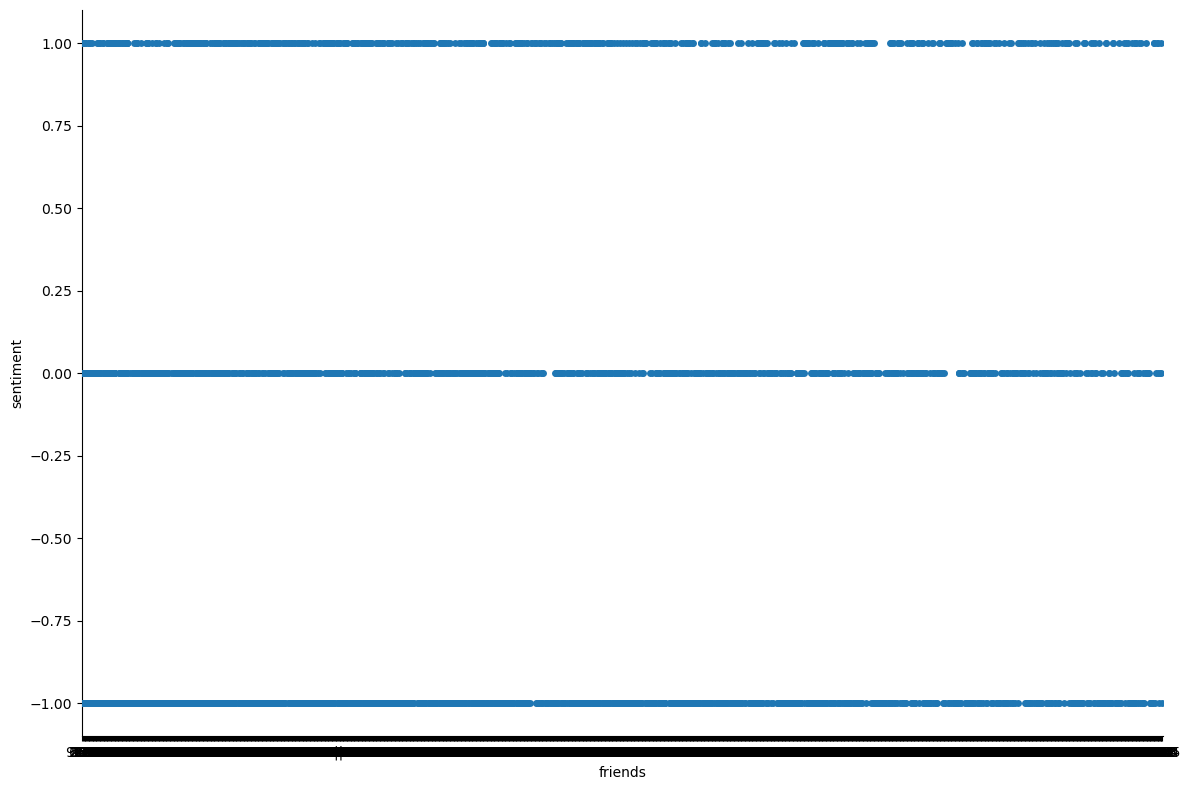

In [52]:
sns.catplot(x='friends', y='sentiment', data=author_data, height=8, aspect=12/8)

<Axes: >

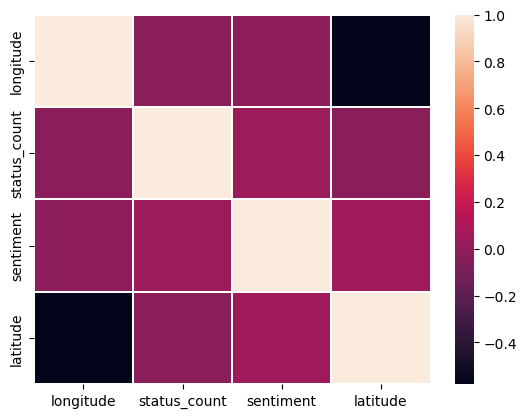

In [47]:
sns.heatmap(author_data.corr(), cbar = True, linewidths = 0.3)

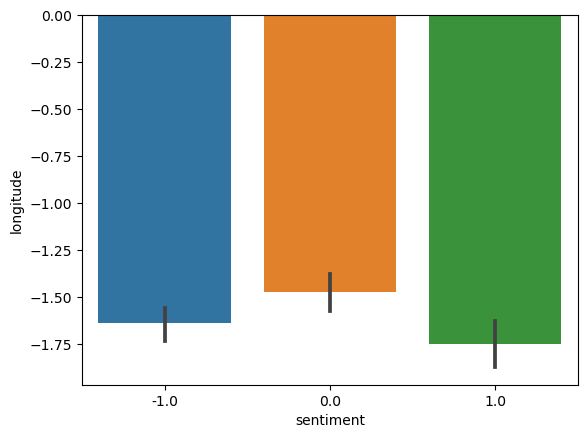

In [51]:
sns.barplot(data=author_data, y="longitude", x = "sentiment")
plt.show()

In [53]:
author_data.isnull().sum()

friends         0
verified        0
longitude       1
status_count    1
sentiment       1
latitude        1
country         1
tweet           1
platform        2
dtype: int64

In [59]:
sns.catplot(data=author_data, kind="bar", x="verified", y="friends", hue="sentiment")

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [64]:
# convert "friends" from Object to int
author_data['friends'] = author_data['friends'].astype('int')


ValueError: invalid literal for int() with base 10: '|| TELL ME YOUR NAME! XD'